# Elliptic Curve Addition

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ECAdd`
Add two elliptic curve points.

This takes elliptic curve points given by (a, b) and (x, y)
and outputs the sum (x_r, y_r) in the second pair of registers.

#### Parameters
 - `n`: The bitsize of the two registers storing the elliptic curve point
 - `mod`: The modulus of the field in which we do the addition. 

#### Registers
 - `a`: The x component of the first input elliptic curve point of bitsize `n`.
 - `b`: The y component of the first input elliptic curve point of bitsize `n`.
 - `x`: The x component of the second input elliptic curve point of bitsize `n`, which will contain the x component of the resultant curve point.
 - `y`: The y component of the second input elliptic curve point of bitsize `n`, which will contain the y component of the resultant curve point.
 - `lam`: The precomputed lambda slope used in the addition operation. 

#### References
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585). Litinski. 2023. Fig 5.


In [2]:
from qualtran.bloqs.factoring.ecc import ECAdd

### Example Instances

In [3]:
n, p = sympy.symbols('n p')
ec_add = ECAdd(n, mod=p)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([ec_add],
           ['`ec_add`'])

### Call Graph

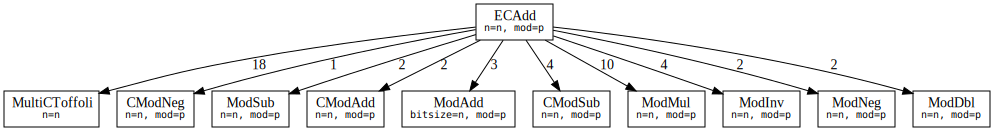

#### Counts totals:
 - `CModAdd`: 2
 - `CModNeg`: 1
 - `CModSub`: 4
 - `ModAdd`: 3
 - `ModDbl`: 2
 - `ModInv`: 4
 - `ModMul`: 10
 - `ModNeg`: 2
 - `ModSub`: 2
 - `MultiCToffoli`: 18

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
ec_add_g, ec_add_sigma = ec_add.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(ec_add_g)
show_counts_sigma(ec_add_sigma)